In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [2]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
service = ctrl.Antecedent(np.arange(0, 10, 0.01), 'service')
quality = ctrl.Antecedent(np.arange(-2, 12, 0.01), 'quality')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

/home/petka/UJEP/PSM/venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


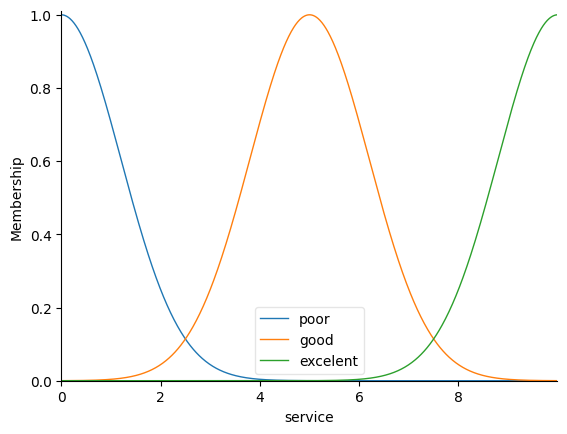

In [14]:
service['poor'] = fuzz.gaussmf(service.universe, 0, 1.2)
service['good'] = fuzz.gaussmf(service.universe, 5, 1.2)
service['excelent'] = fuzz.gaussmf(service.universe, 10, 1.2)

service.view()

In [4]:
quality['rancid'] = fuzz.trapmf(quality.universe, [-2,0,2,4])
quality['delicious'] = fuzz.trapmf(quality.universe, [6,8,10,12])

/home/petka/UJEP/PSM/venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


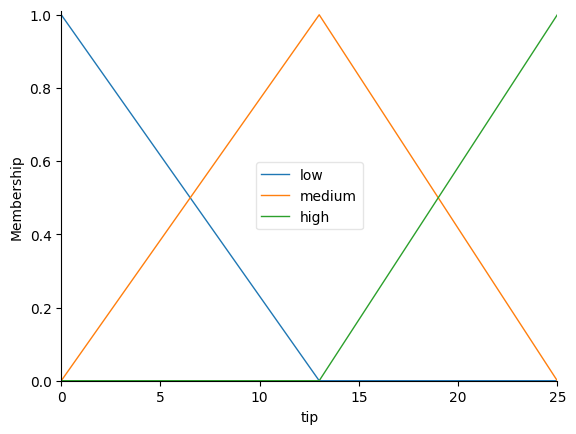

In [16]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

tip.view()

/home/petka/UJEP/PSM/venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


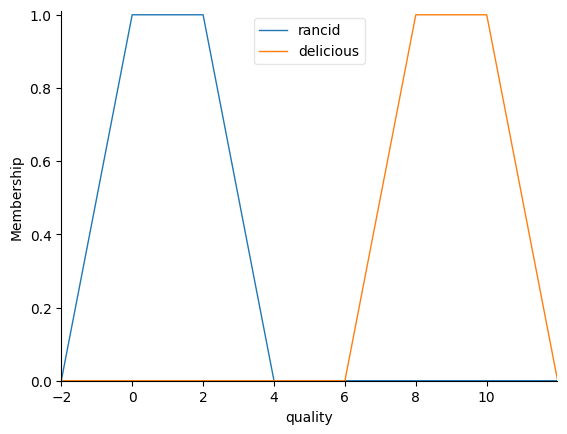

In [6]:
# You can see how these look with .view()
quality.view()

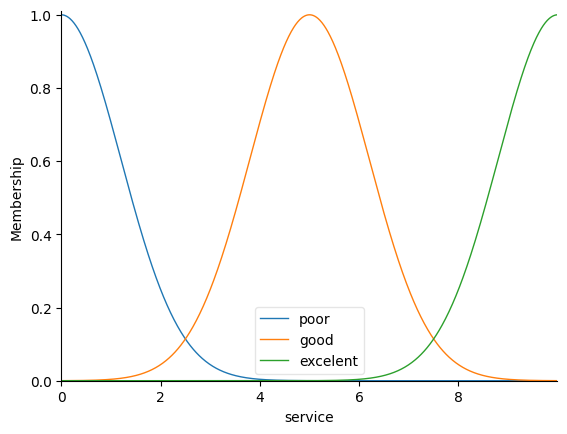

In [7]:
service.view()

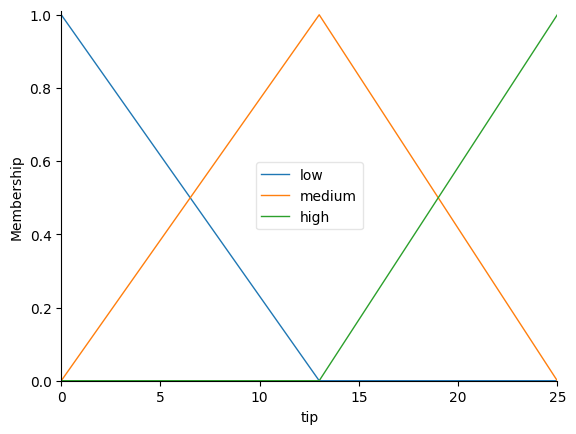

In [8]:
tip.view()

In [9]:
rule1 = ctrl.Rule(quality['rancid'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['good'], tip['medium'])
rule3 = ctrl.Rule(service['excelent'] | quality['delicious'], tip['high'])


In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [11]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

In [13]:
print(tipping.output['tip'])
tip.view(sim=tipping)

KeyError: 'tip'